# Data Preparation

In [ ]:
from google.colab import files

uploaded = files.upload() # Undergraduate Stress Survey (Responses) - Cleaned Data

Saving Undergraduate Stress Survey (Responses) - Cleaned Data.csv to Undergraduate Stress Survey (Responses) - Cleaned Data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('Undergraduate Stress Survey (Responses) - Cleaned Data.csv', keep_default_na = False)
df.head()

,Grade,Grad Year,School,Major,Major Type,STEM?,Credits,Grades,Hours/Day Studying,Hours/Day HW,Hours/Day Free Time,Hours Sleep Weekday,Hours Sleep Weekend,Daily Stress (1-10),Stress Effects,Biggest Stressor
0,Freshman,2026,QST,Business Administration,Business,Non-STEM,16.0,Mostly A’s,3-4,1-2,3-4,4-6,7-9,6,"Physical, Mental",Work - Study - Life balance
1,Freshman,2026,CDS,Data Science,STEM,STEM,16.0,Mostly A’s,1-2,1-2,3-4,4-6,10+,5,"Physical, Emotional, Mental, Social",Grades
2,Freshman,2026,CDS,Data Science,STEM,STEM,16.0,Mostly A’s,4-5,3-4,5+,7-9,7-9,7,"Emotional, Mental",Self-Imposed Pressure
3,Freshman,2026,CDS,Data Science,STEM,STEM,17.0,All A’s,1-2,1-2,3-4,4-6,7-9,8,"Emotional, Mental",Relationship with other students
4,Junior,2024,CDS,Data Science,STEM,STEM,16.0,Mostly B’s,<1,1-2,3-4,7-9,7-9,4,"Physical, Emotional",Classwork and/or rigor of classes


In [ ]:
# relevant columns

variables = [
  'Grade', 'School', 'Major', 'Major Type', 'STEM?', 'Credits', 'Grades', 'Hours/Day Studying', 
  'Hours/Day HW', 'Hours/Day Free Time', 'Hours Sleep Weekday', 'Hours Sleep Weekend', 
  'Daily Stress (1-10)', 'Stress Effects', 'Biggest Stressor'
]

In [ ]:
# ordering categories for variables

variables_order = {'Grade': ('Freshman', 'Sophomore', 'Junior', 'Senior'),
                   'School': ('CAS', 'COM', 'ENG', 'CFA', 'CGS', 'SAR', 'CDS', 
                              'Pardee', 'KHC', 'QST', 'SHA', 'Wheelock'),
                   'Major': df['Major'].unique(),
                   'Major Type': ('Arts and Humanities', 'Business', 
                                  'Health and Medicine', 
                                  'Multi-Interdisciplinary Studies', 
                                  'Public and Social Services', 'STEM', 
                                  'Social Sciences'),
                   'STEM?': ("Non-STEM", "STEM"),
                   'Credits': (12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5,
                               16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 
                               20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5,
                               24.0, 24.5, 25.0),
                   'Grades': ("Mostly D’s", "Mostly C’s", "Mostly B’s", 
                              "Mostly A’s", "All A’s"),
                   'Hours/Day Studying': ("<1", "1-2", "3-4", "4-5", "5+"),
                   'Hours/Day HW': ("<1", "1-2", "3-4", "4-5", "5+"),
                   'Hours/Day Free Time': ("<1", "1-2", "3-4", "4-5", "5+"),
                   'Hours Sleep Weekday': ("4-6", "7-9", "10+"),
                   'Hours Sleep Weekend': ("4-6", "7-9", "10+"),
                   'Daily Stress (1-10)': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
                   'Stress Effects': ('Emotional', 'Emotional, Mental', 
                                      'Emotional, Social',
                                      'Emotional, Mental, Social', 'Mental', 
                                      'Mental, Social', 'Physical', 
                                      'Physical, Emotional', 'Physical, Mental',
                                      'Physical, Social', 
                                      'Physical, Emotional, Mental',
                                      'Physical, Emotional, Social', 
                                      'Physical, Emotional, Mental, Social', 
                                      'Social', 'N/A'),
                   'Biggest Stressor': ('Relationship with other students', 
                                        'Classwork and/or rigor of classes', 
                                        'Grades', 'Peer Pressure', 
                                        'Self-Imposed Pressure', 
                                        'LGBTQ+ Issues', 'Home Life', 
                                        'Financial pressure (e.g. tuition, living costs)',
                                        'Work - Study - Life balance', 
                                        'Relationship with (some) faculty members', 
                                        'Relationships with friends', 'Health')
}

# Exploring the Data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


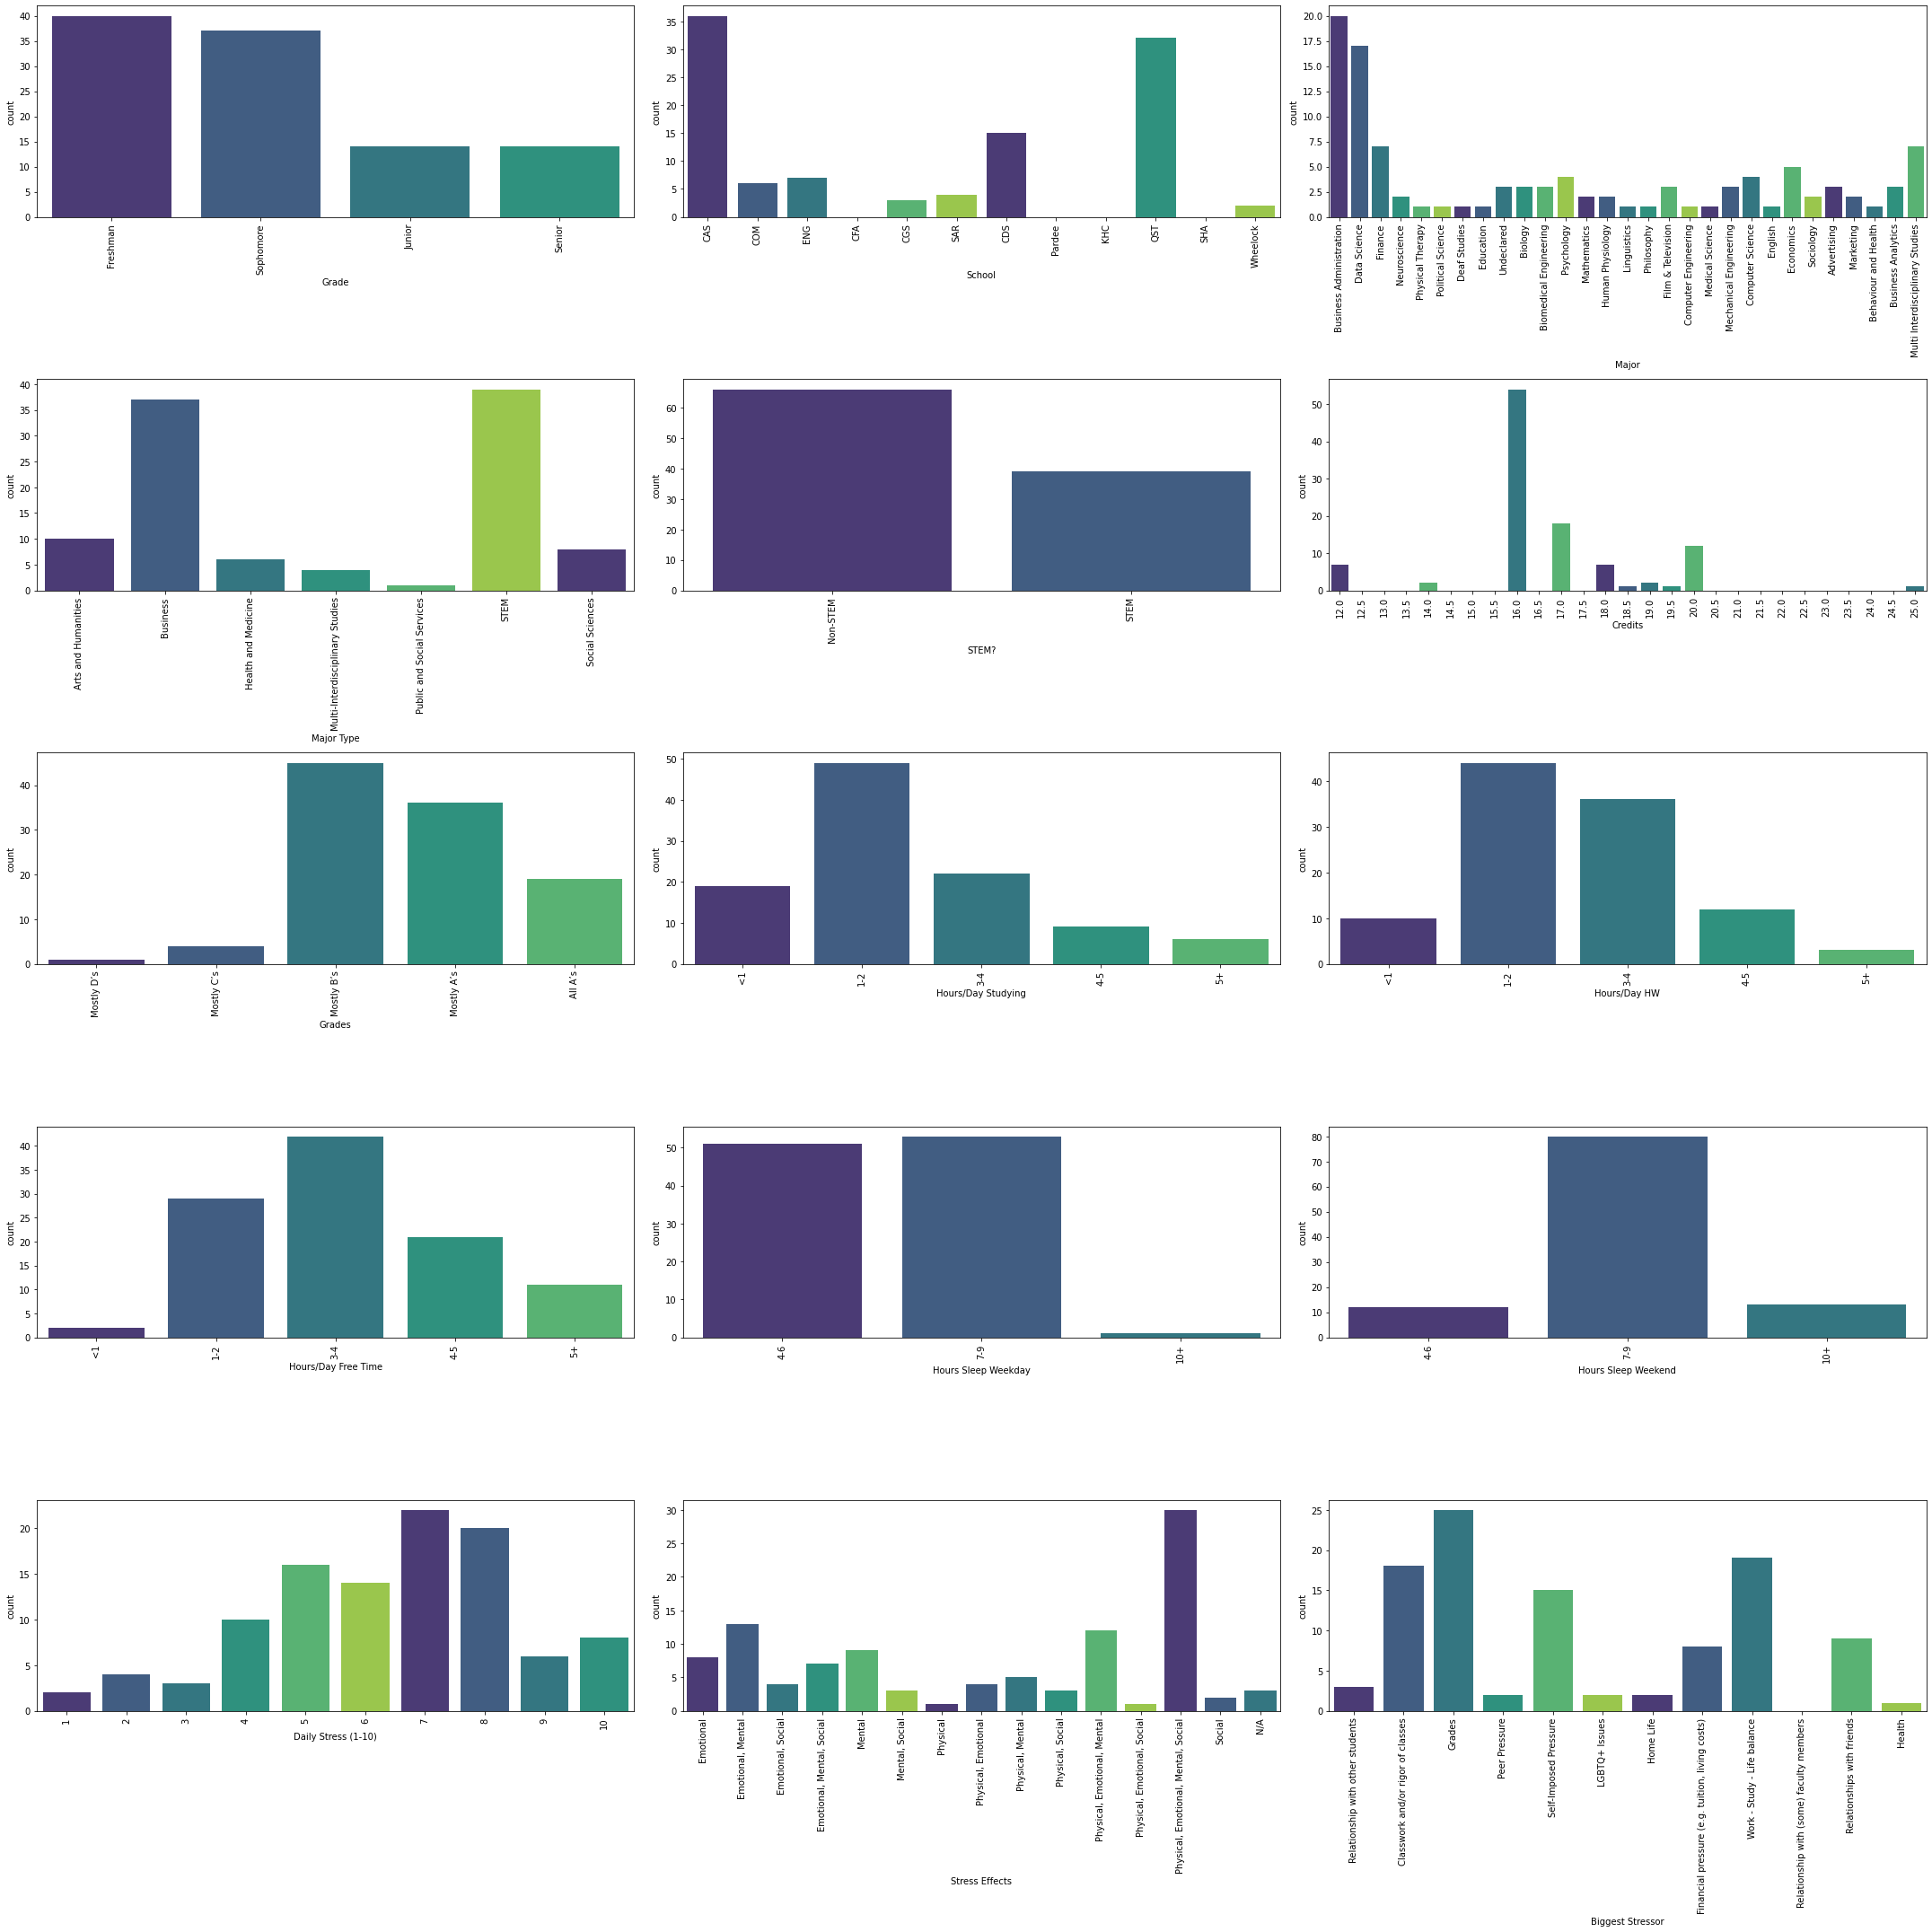

In [ ]:
# visual breakdown of categorical data

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

fig, ax = plt.subplots(5, 3, figsize = (30, 30))

for var_name, subplot in zip(variables, ax.flatten()):
  sns.countplot(df[var_name], order = variables_order[var_name], palette = sns.color_palette("viridis"), ax = subplot)
  for label in subplot.get_xticklabels():
      label.set_rotation(90)
  warnings.filterwarnings("ignore")

fig.tight_layout()

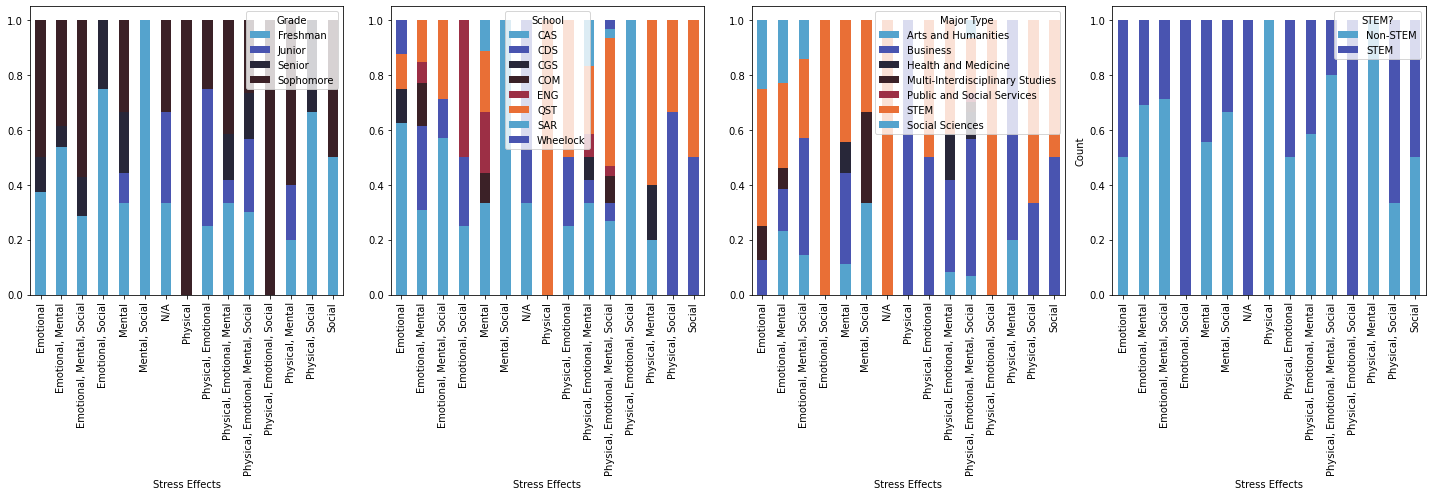

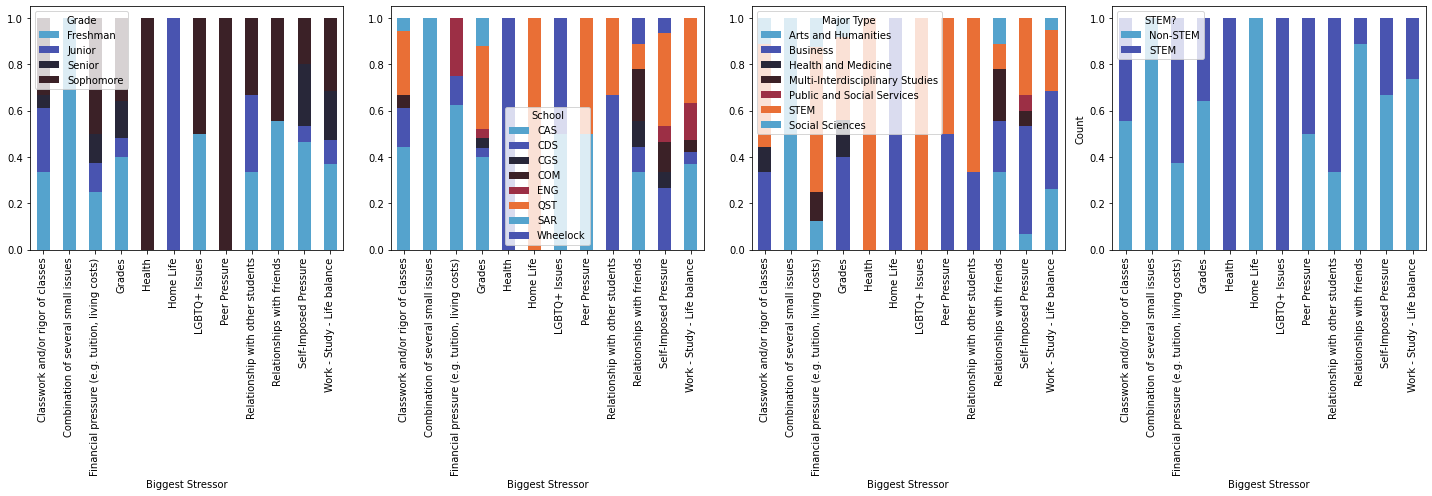

In [ ]:
# potential relationships for categorical v. categorical variables

stacks = ['Grade', 'School', 'Major Type', 'STEM?']

bottom = ['Stress Effects', 'Biggest Stressor']

for var1 in bottom:
  fig, ax = plt.subplots(1, 4, figsize = (20, 7))

  for var2, subplot in zip(stacks, ax.flatten()):
    ct = pd.crosstab(index = df[var1], columns = df[var2], normalize = "index")
    ct.plot(kind = 'bar', stacked = True, color = sns.color_palette("icefire"), ax = subplot)
    plt.xlabel(var1)
    plt.ylabel('Count')

    for label in subplot.get_xticklabels():
      label.set_rotation(90)
    warnings.filterwarnings("ignore")

  fig.tight_layout()

None of the distributions seem to be uniform. The information also doesn't seem to be very meaningful.

In [ ]:
# all discrete numerical variables
histogram_bins = ['Grades', 'Daily Stress (1-10)', 'Hours/Day Studying', 
                  'Hours/Day HW', 'Hours/Day Free Time', 
                  'Hours Sleep Weekday', 'Hours Sleep Weekend', 'Credits'
]

#prepping vars ^ for histograms
hist_df = df.copy()

def hist(column):
  values = []
  for n in df[column]:  
    values.append(variables_order[column].index(n) + 0.5)
  hist_df[f'hist_{column}'] = values

for i in histogram_bins:
  hist(i)

hist_df.head()

,Grade,Grad Year,School,Major,Major Type,STEM?,Credits,Grades,Hours/Day Studying,Hours/Day HW,...,Stress Effects,Biggest Stressor,hist_Grades,hist_Daily Stress (1-10),hist_Hours/Day Studying,hist_Hours/Day HW,hist_Hours/Day Free Time,hist_Hours Sleep Weekday,hist_Hours Sleep Weekend,hist_Credits
0,Freshman,2026,QST,Business Administration,Business,Non-STEM,16.0,Mostly A’s,3-4,1-2,...,"Physical, Mental",Work - Study - Life balance,3.5,5.5,2.5,1.5,2.5,0.5,1.5,8.5
1,Freshman,2026,CDS,Data Science,STEM,STEM,16.0,Mostly A’s,1-2,1-2,...,"Physical, Emotional, Mental, Social",Grades,3.5,4.5,1.5,1.5,2.5,0.5,2.5,8.5
2,Freshman,2026,CDS,Data Science,STEM,STEM,16.0,Mostly A’s,4-5,3-4,...,"Emotional, Mental",Self-Imposed Pressure,3.5,6.5,3.5,2.5,4.5,1.5,1.5,8.5
3,Freshman,2026,CDS,Data Science,STEM,STEM,17.0,All A’s,1-2,1-2,...,"Emotional, Mental",Relationship with other students,4.5,7.5,1.5,1.5,2.5,0.5,1.5,10.5
4,Junior,2024,CDS,Data Science,STEM,STEM,16.0,Mostly B’s,<1,1-2,...,"Physical, Emotional",Classwork and/or rigor of classes,2.5,3.5,0.5,1.5,2.5,1.5,1.5,8.5


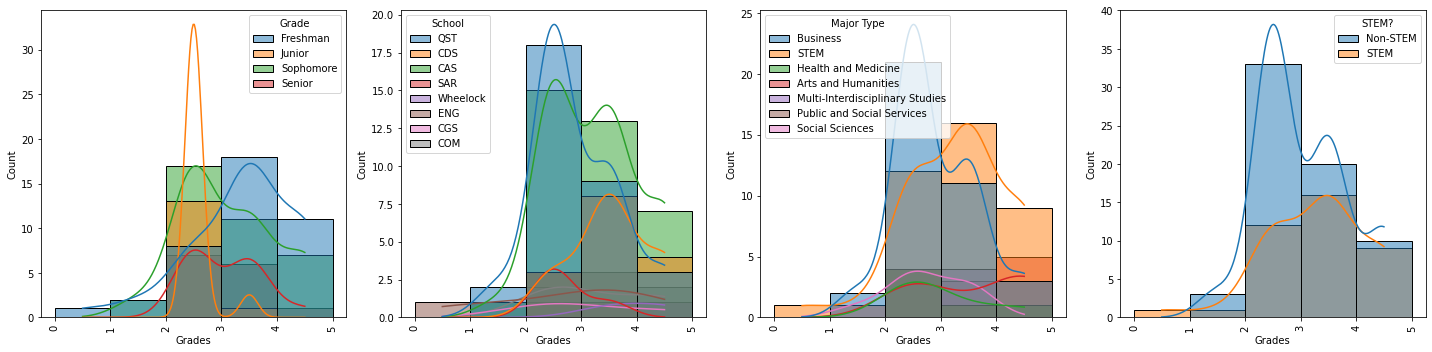

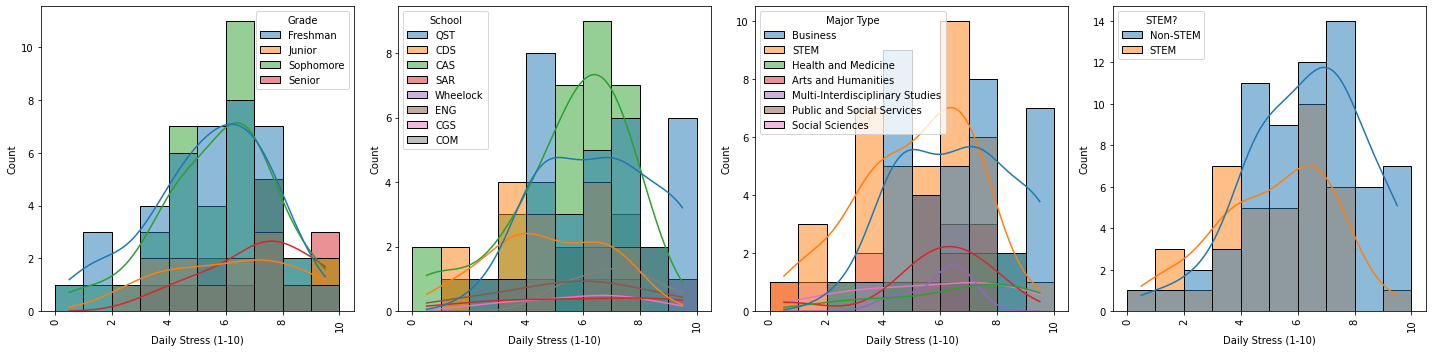

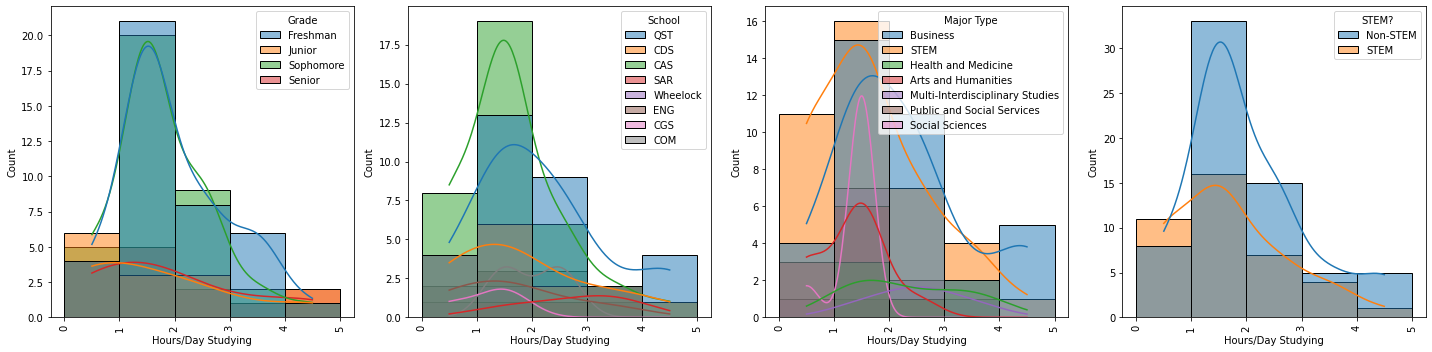

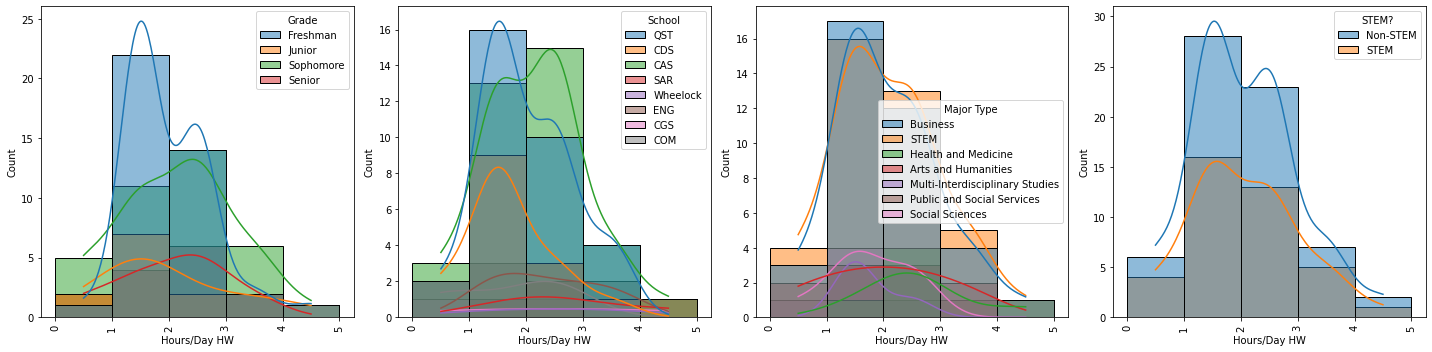

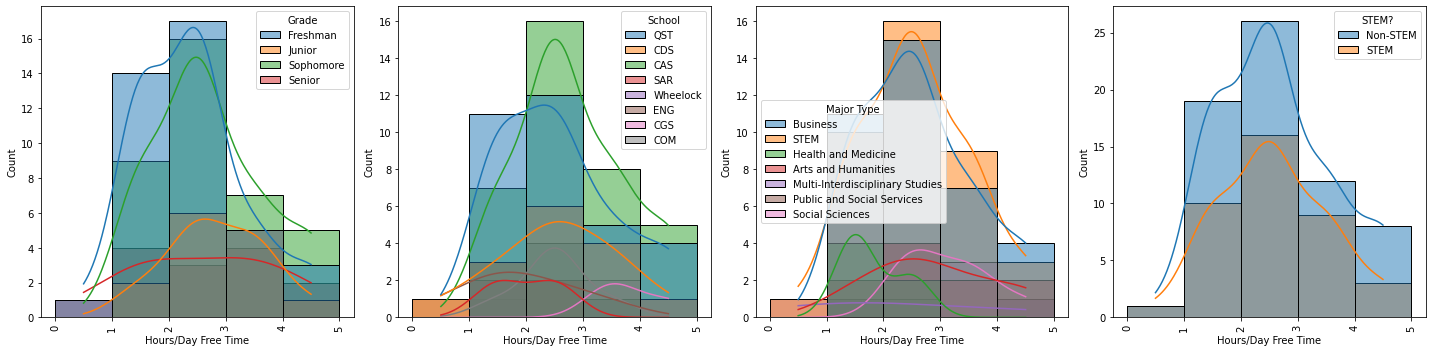

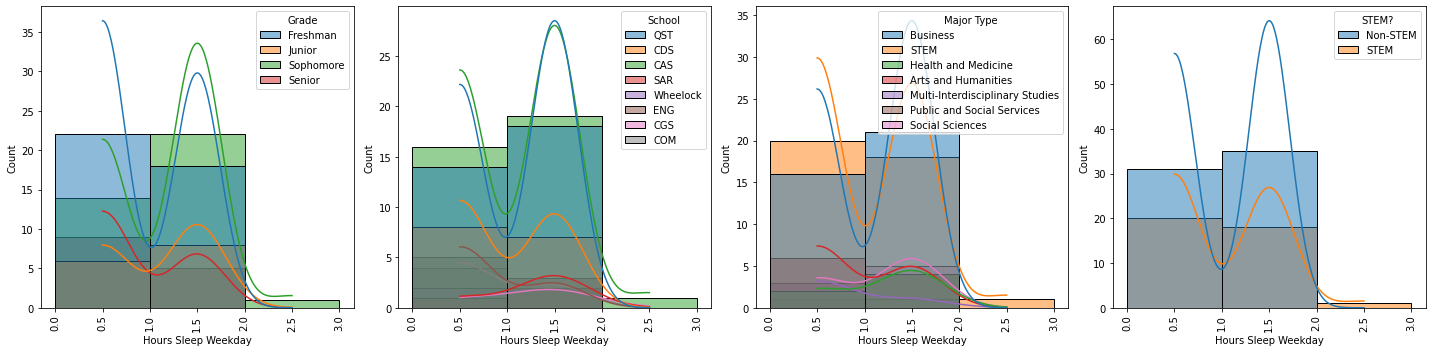

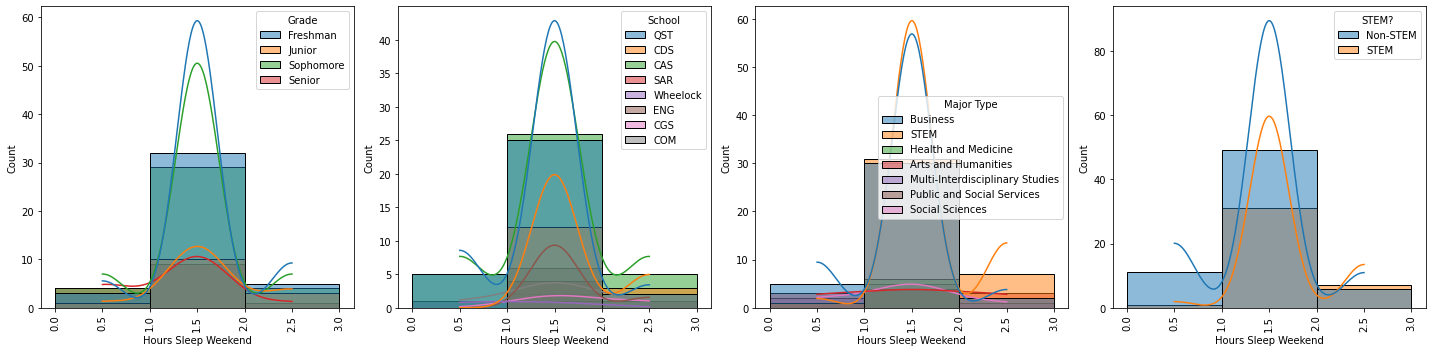

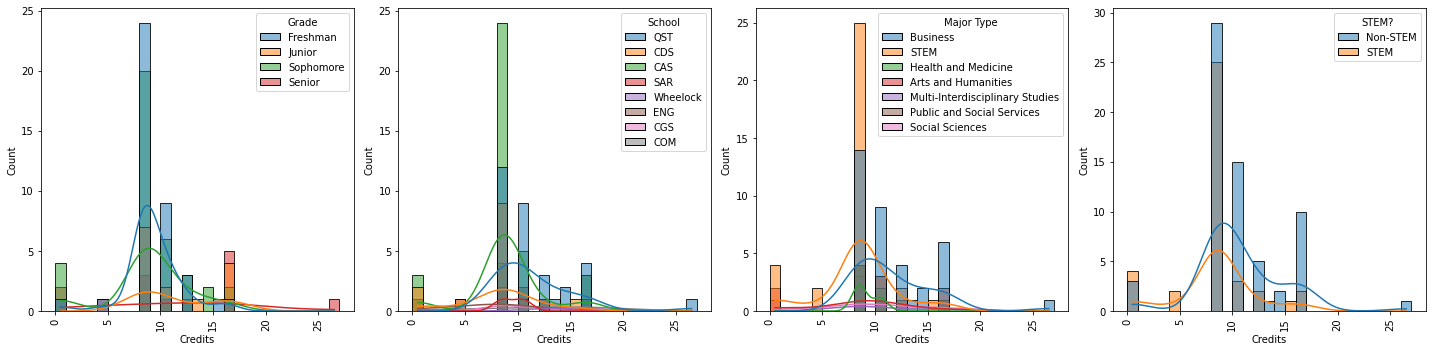

In [ ]:
#demographic variables
disparity = ['Grade', 'School', 'Major Type', 'STEM?',
]

# potential relationships for categorical v. discrete numerical variables
for variable in histogram_bins:
  fig, ax = plt.subplots(1, 4, figsize = (20, 5))
  for var, subplot in zip(disparity, ax.flatten()):
    sns.histplot(data = hist_df, x = f'hist_{variable}', hue = var, binwidth = 1, 
                 binrange = (0, len(variables_order[variable])), kde = True, ax = subplot)
    subplot.set_xlabel(variable)
    subplot.set_ylabel("Count")
    for label in subplot.get_xticklabels():
      label.set_rotation(90)
    
  fig.tight_layout()

Observations
*   Business-type majors/QST students seem to be taking more credits
*   It seems like Health and Medicine type majors have less free time than other major types
*   CGS students seem to have more free time
*   SAR and ENG students seem to have less free time
*   It seems that CAS students have more hours of HW a day
*   Non-STEM grades seem to be worse
*   CDS grades seem to be above average
*   Freshmen seem to have overall better grades

We will test the validity of these observations in the stats tests section.









# Stats Tests

In [ ]:
# problem statement vars

         #major-related demographics v. stress
tests = [('Major', 'Daily Stress (1-10)'), 
         ('Major Type', 'Daily Stress (1-10)'), 
         ('School', 'Daily Stress (1-10)'), 
         ('STEM?', 'Daily Stress (1-10)'), 

         #stem-related demographics v. sleep
         ('Major', 'Hours Sleep Weekday'),
         ('Major Type', 'Hours Sleep Weekday'), 
         ('School', 'Hours Sleep Weekday'), 
         ('STEM?', 'Hours Sleep Weekday'),

         ('Major', 'Hours Sleep Weekend'),
         ('Major Type', 'Hours Sleep Weekend'), 
         ('School', 'Hours Sleep Weekend'), 
         ('STEM?', 'Hours Sleep Weekend')]

In [ ]:
#function to assess >5 assumption of chi-square

def five(independent, dependent):
  ct = pd.crosstab(df[independent], df[dependent], margins = True)
  
  obs_5 = 0

  for obs_row in ct.to_numpy():
    for n in obs_row:
      if n < 5 or n == 5:
        obs_5 += 1
  
  if 'binary' in dependent:
    if obs_5 > 0.8*(len(variables_order[independent]) + 1)*(len(variables_order[dependent.replace('binary_', '')]) + 1):
      return False
  else:
    if obs_5 > 0.8*(len(variables_order[independent]) + 1)*(len(variables_order[dependent]) + 1):
      return False

  c, p, dof, exp = chi2_contingency(ct)
  
  exp_5 = 0

  for exp_row in exp:
    for i in exp_row:
      if i < 5 or n == 5:
        exp_5 += 1
  
  if 'binary' in dependent:
    if exp_5 > 0.8*(len(variables_order[independent]) + 1)*(len(variables_order[dependent.replace('binary_', '')]) + 1):
      return False
  else:
    if exp_5 > 0.8*(len(variables_order[independent]) + 1)*(len(variables_order[dependent]) + 1):
      return False

#function to assess chi-square test
def chi(independent, dependent):
  ct = pd.crosstab(df[independent], df[dependent], margins = True)
  c, p, dof, exp = chi2_contingency(ct)
  if p <.05: print(f'{independent} vs. {dependent} - True, {p}')
  else: print('False', p)

In [ ]:
# testing for significant differences
from scipy.stats import chi2_contingency 

for (independent, dependent) in tests:

  if five(independent, dependent) == False:
    print(f'{independent} vs. {dependent} - Threshold needed')

  else:
    chi(independent, dependent)

Major vs. Daily Stress (1-10) - Threshold needed
False 0.29280899802299953
False 0.41195481664073264
False 0.8199839983901192
Major vs. Hours Sleep Weekday - Threshold needed
False 0.9993832012025631
False 0.9990230003161753
False 0.9182385933255699
Major vs. Hours Sleep Weekend - Threshold needed
False 0.24586443653013415
False 0.98759464750002
False 0.43356842488149916


It seems that some test pairs do not qualify for the chi-square test, since either the observed or expected values are not all >5. This means Fisher's exact test must be used. However, fisher's exact test from scipy.stats only supports a 2x2 contingency table. Therefore, we will attempt to introduce a threshold to the dependent variable to see if it can then qualify for the chi-square test. 

In [ ]:
# testing chi-square validity for thresholds for daily stress

for n in range(1, 11):
  binary_stress = []
  for i in df['Daily Stress (1-10)']:
    if i == n or int(i) > int(n):
      binary_stress.append(1)
    else:
      binary_stress.append(0)

  df['binary_Daily Stress (1-10)'] = binary_stress

  if five('Major', 'binary_Daily Stress (1-10)') == False:
    print(f'Cannot use chi-square, threshold = {n}')
  
  else:
    print(f'Can use chi-square, threshold = {n}')

Can use chi-square, threshold = 1
Can use chi-square, threshold = 2
Can use chi-square, threshold = 3
Can use chi-square, threshold = 4
Can use chi-square, threshold = 5
Can use chi-square, threshold = 6
Can use chi-square, threshold = 7
Can use chi-square, threshold = 8
Can use chi-square, threshold = 9
Can use chi-square, threshold = 10


In [ ]:
# chi square tests for daily stress at different thresholds

for n in range(1, 11):
  binary_stress = []
  for i in df['Daily Stress (1-10)']:
    if i == n or int(i) > int(n):
      binary_stress.append(1)
    else:
      binary_stress.append(0)

  df['binary_Daily Stress (1-10)'] = binary_stress

  chi('Major', 'binary_Daily Stress (1-10)')

False 1.0
False 0.43417807769408134
False 0.9991208491511198
False 0.99910767391721
False 0.9986390608941406
False 0.9990453649131069
False 0.9996973264175332
False 0.9946246252365242
False 0.9986407088857269
False 0.999999737999979


No noteworthy findings; at a 95% level of confidence (probability of type 1 error, rejected null even though it is true, is .05) there is not a statistically significant difference between Major and Stress for every threshold.

In [ ]:
# testing chi-square validity for thresholds for Hours of Sleep Weekday
binary_sleep_weekday = []

for i in df['Hours Sleep Weekday']:
  if i == '7-9' or i == '10+':    #this is the only meaningful threshold
    binary_sleep_weekday.append(1)
  else:
    binary_sleep_weekday.append(0)

df['binary_Hours Sleep Weekday'] = binary_sleep_weekday

if five('Major', 'binary_Hours Sleep Weekday') == False:
  print('Cannot use chi-square')
  
else:
  chi('Major', 'binary_Hours Sleep Weekday')

False 0.9992258935323464


No noteworthy findings; at a 95% level of confidence (probability of type 1 error, rejected null even though it is true, is .05) there is not a statistically significant difference between Major and Hours of Sleep on a Weekday for a threshold of 6+ hours.

In [ ]:
# testing chi-square validity for thresholds for Hours of Sleep Weekday
binary_sleep_weekend = []

for i in df['Hours Sleep Weekend']:
  if i == '7-9' or i == '10+':    #this is the only meaningful threshold
    binary_sleep_weekend.append(1)
  else:
    binary_sleep_weekend.append(0)

df['binary_Hours Sleep Weekend'] = binary_sleep_weekend

if five('Major', 'binary_Hours Sleep Weekend') == False:
  print('Cannot use chi-square')
  
else:
  chi('Major', 'binary_Hours Sleep Weekend')

False 0.9957963097890818


No noteworthy findings; at a 95% level of confidence (probability of type 1 error, rejected null even though it is true, is .05) there is not a statistically significant difference between Major and Hours of Sleep on a Weekend for a threshold of 6+ hours.

In [ ]:
# other variable pairings
def pairs(string_list):
  pair_list = []
  for a in string_list:
    for b in string_list:
      if b != a:
        if not (b,a) in pair_list:
          if not (a,b) in tests:
            if not (b,a) in tests:
              pair_list.append((a,b))
  return pair_list

# testing other pairs
threshold = []

for (independent, dependent) in pairs(variables):  
  if five(independent, dependent) == False:
    threshold.append(f'{independent} vs. {dependent} - Threshold needed')

  else:
    chi(independent, dependent)

Grade vs. School - True, 0.044341960833125686
False 0.3559855265775064
False 0.7772510975044911
False 0.23635554991339808
False 0.1444551738246174
False 0.4903647056955954
False 0.8816078146127554
False 0.9537727295808117
False 0.9425202900682759
False 0.9115248198732998
False 0.9980649140750453
False 0.906087247699204
School vs. Major - True, 1.1714438120053685e-37
School vs. Major Type - True, 9.639390692700836e-30
School vs. STEM? - True, 5.08597030650365e-07
False 0.8361613933784608
False 0.7541376538594172
False 0.9447728449125203
False 0.5012084020479772
False 0.8724843713266698
False 0.9550384332315294
False 0.9433509685114851
False 0.9999995901938864
Major Type vs. STEM? - True, 5.184658443865517e-16
False 0.9633943149543923
False 0.5636370385034041
False 0.6760874120325704
False 0.9559906457292516
False 0.8132970130061741
False 0.7050468596596201
False 0.8371487610054825
False 0.857060277971556
False 0.9999999454055308
False 0.9998290485194776
False 0.7833365306769544
False 0.

All statistically significant relationships are already known.

In [ ]:
for n in threshold:
  print(n)

Grade vs. Major - Threshold needed
Grade vs. Stress Effects - Threshold needed
Major vs. Major Type - Threshold needed
Major vs. STEM? - Threshold needed
Major vs. Grades - Threshold needed
Major vs. Hours/Day Studying - Threshold needed
Major vs. Hours/Day HW - Threshold needed
Major vs. Hours/Day Free Time - Threshold needed
Major vs. Stress Effects - Threshold needed
Major vs. Biggest Stressor - Threshold needed
Major Type vs. Stress Effects - Threshold needed
Major Type vs. Biggest Stressor - Threshold needed
Grades vs. Stress Effects - Threshold needed
Hours/Day Studying vs. Stress Effects - Threshold needed
Hours/Day HW vs. Stress Effects - Threshold needed
Hours/Day Free Time vs. Stress Effects - Threshold needed
Daily Stress (1-10) vs. Stress Effects - Threshold needed
Daily Stress (1-10) vs. Biggest Stressor - Threshold needed
Stress Effects vs. Biggest Stressor - Threshold needed


Some of the above pairs are pointless (ex: Grade vs. Major). Others cannot have a threshold due to the nature of the variables (ex: Stress Effects vs. Biggest Stressor). The remaining pairs to examine are:

* Major vs. Grades
* Major vs. Hours/Day Studying
* Major vs. Hours/Day HW
* Major vs. Hours/Day Free Time
* Daily Stress (1-10) vs. Stress Effects
* Daily Stress (1-10) vs. Biggest Stressor

The above relationships with Major as the independent variable are unimportant since we already know that there is no correlation between Major and stress. If there was a correlation, the above relationships could be insightful as to why. 

The last two relationships don't have much to do with the problem statement.

# Visualization

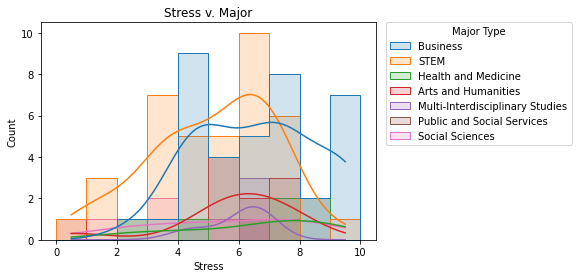

In [ ]:
#Major v. Stress
g = sns.histplot(data = hist_df, x = 'hist_Daily Stress (1-10)', 
                 hue = 'Major Type', binwidth = 1, binrange = (0, 10), 
                 kde = True, palette = sns.color_palette("tab10", 7), 
                 element = 'step', alpha = 0.2)

plt.xlabel('Stress')
plt.ylabel("Count")
plt.title('Stress v. Major')
sns.move_legend(g, "center right", bbox_to_anchor = (1.6, 0.72))

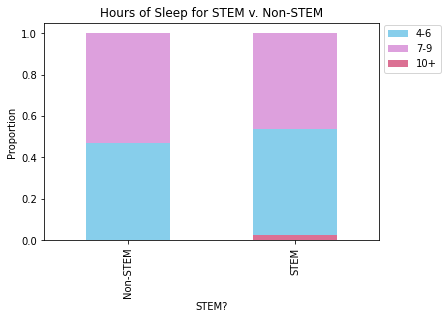

In [ ]:
#STEM? v. Sleep
ct = pd.crosstab(index = df['STEM?'], columns = df['Hours Sleep Weekday'], normalize = "index")
ct.plot(kind = 'bar', stacked = True, color = ['palevioletred', 'skyblue', 'plum'])

plt.xlabel('STEM?')
plt.ylabel('Proportion')
plt.title('Hours of Sleep for STEM v. Non-STEM')

handles, labels = plt.gca().get_legend_handles_labels()

order = [1, 2, 0]

plt.legend([handles[i] for i in order], [labels[i] for i in order],
           loc = 'center right', bbox_to_anchor = (1.2, 0.88))

fig.tight_layout()